# Assignment 3
## Parth Kothari
## Roll No.: 2303121012

In [2]:
import matplotlib.pyplot as plt
import numpy as np
#defined functions
def V(x):
    return (x**2 - 1)**2
def V_1(x):
    return 4 * x**3 - 4 * x

# Problem 1

In [3]:
# All the functions defined
def Eulers_Method(x0, Px0, dt, num):
    """
    Eulers Method
    """
    x_values = [] # Storing the x values and Px values
    Px_values = [] 

    x = x0
    Px = Px0

    for i in range(num): 
        x_values.append(x)
        Px_values.append(Px)
        
        Px -= dt * V_1(x)

        x += dt * Px

    return x_values, Px_values


# 2nd Order Runge Kutta

def Runge_Kutta_2nd(x0, Px0, dt, num):
    """
    2nd Order Runge Kutta
    """
    x_values = [] 
    Px_values = [] 

    x = x0
    Px = Px0

    for i in range(num): 
        x_values.append(x)
        Px_values.append(Px)
        
        Px -= dt * V_1(x)
        x += dt * Px
        
        k1_x = dt * Px
        k1_px =-dt * V_1(x)

        k2_x = dt * (Px + 0.5 * k1_px)
        k2_px = - dt * V_1(x + 0.5 * k1_x)

        x = x + k2_x
        Px = Px + k2_px

    return x_values, Px_values



def Range_Kutta_4rth(x0, Px0, dt, steps):
    """
    4rth Order Runge Kutta
    """
    x_values = [] 
    Px_values = [] 

    x = x0
    Px = Px0

    for i in range(steps): 
        x_values.append(x)
        Px_values.append(Px)
    
        Px -= dt * V_1(x)
        x += dt * Px
        
        
        k1_x = dt * Px
        k1_Px = -dt * V_1(x)

    
        k2_x = dt * (Px + 0.5 * k1_Px)
        k2_Px = -dt * V_1(x + 0.5 * k1_x)

        
        k3_x = dt * (Px + 0.5 * k2_Px)
        k3_Px = -dt * V_1(x + 0.5 * k2_x)

        
        k4_x = dt * (Px + k3_Px)
        k4_Px = -dt * V_1(x + k3_x)

        
        x += (k1_x + 2 * k2_x + 2 * k3_x + k4_x) / 6
        Px += (k1_Px + 2 * k2_Px + 2 * k3_Px + k4_Px) / 6

    return x_values, Px_values

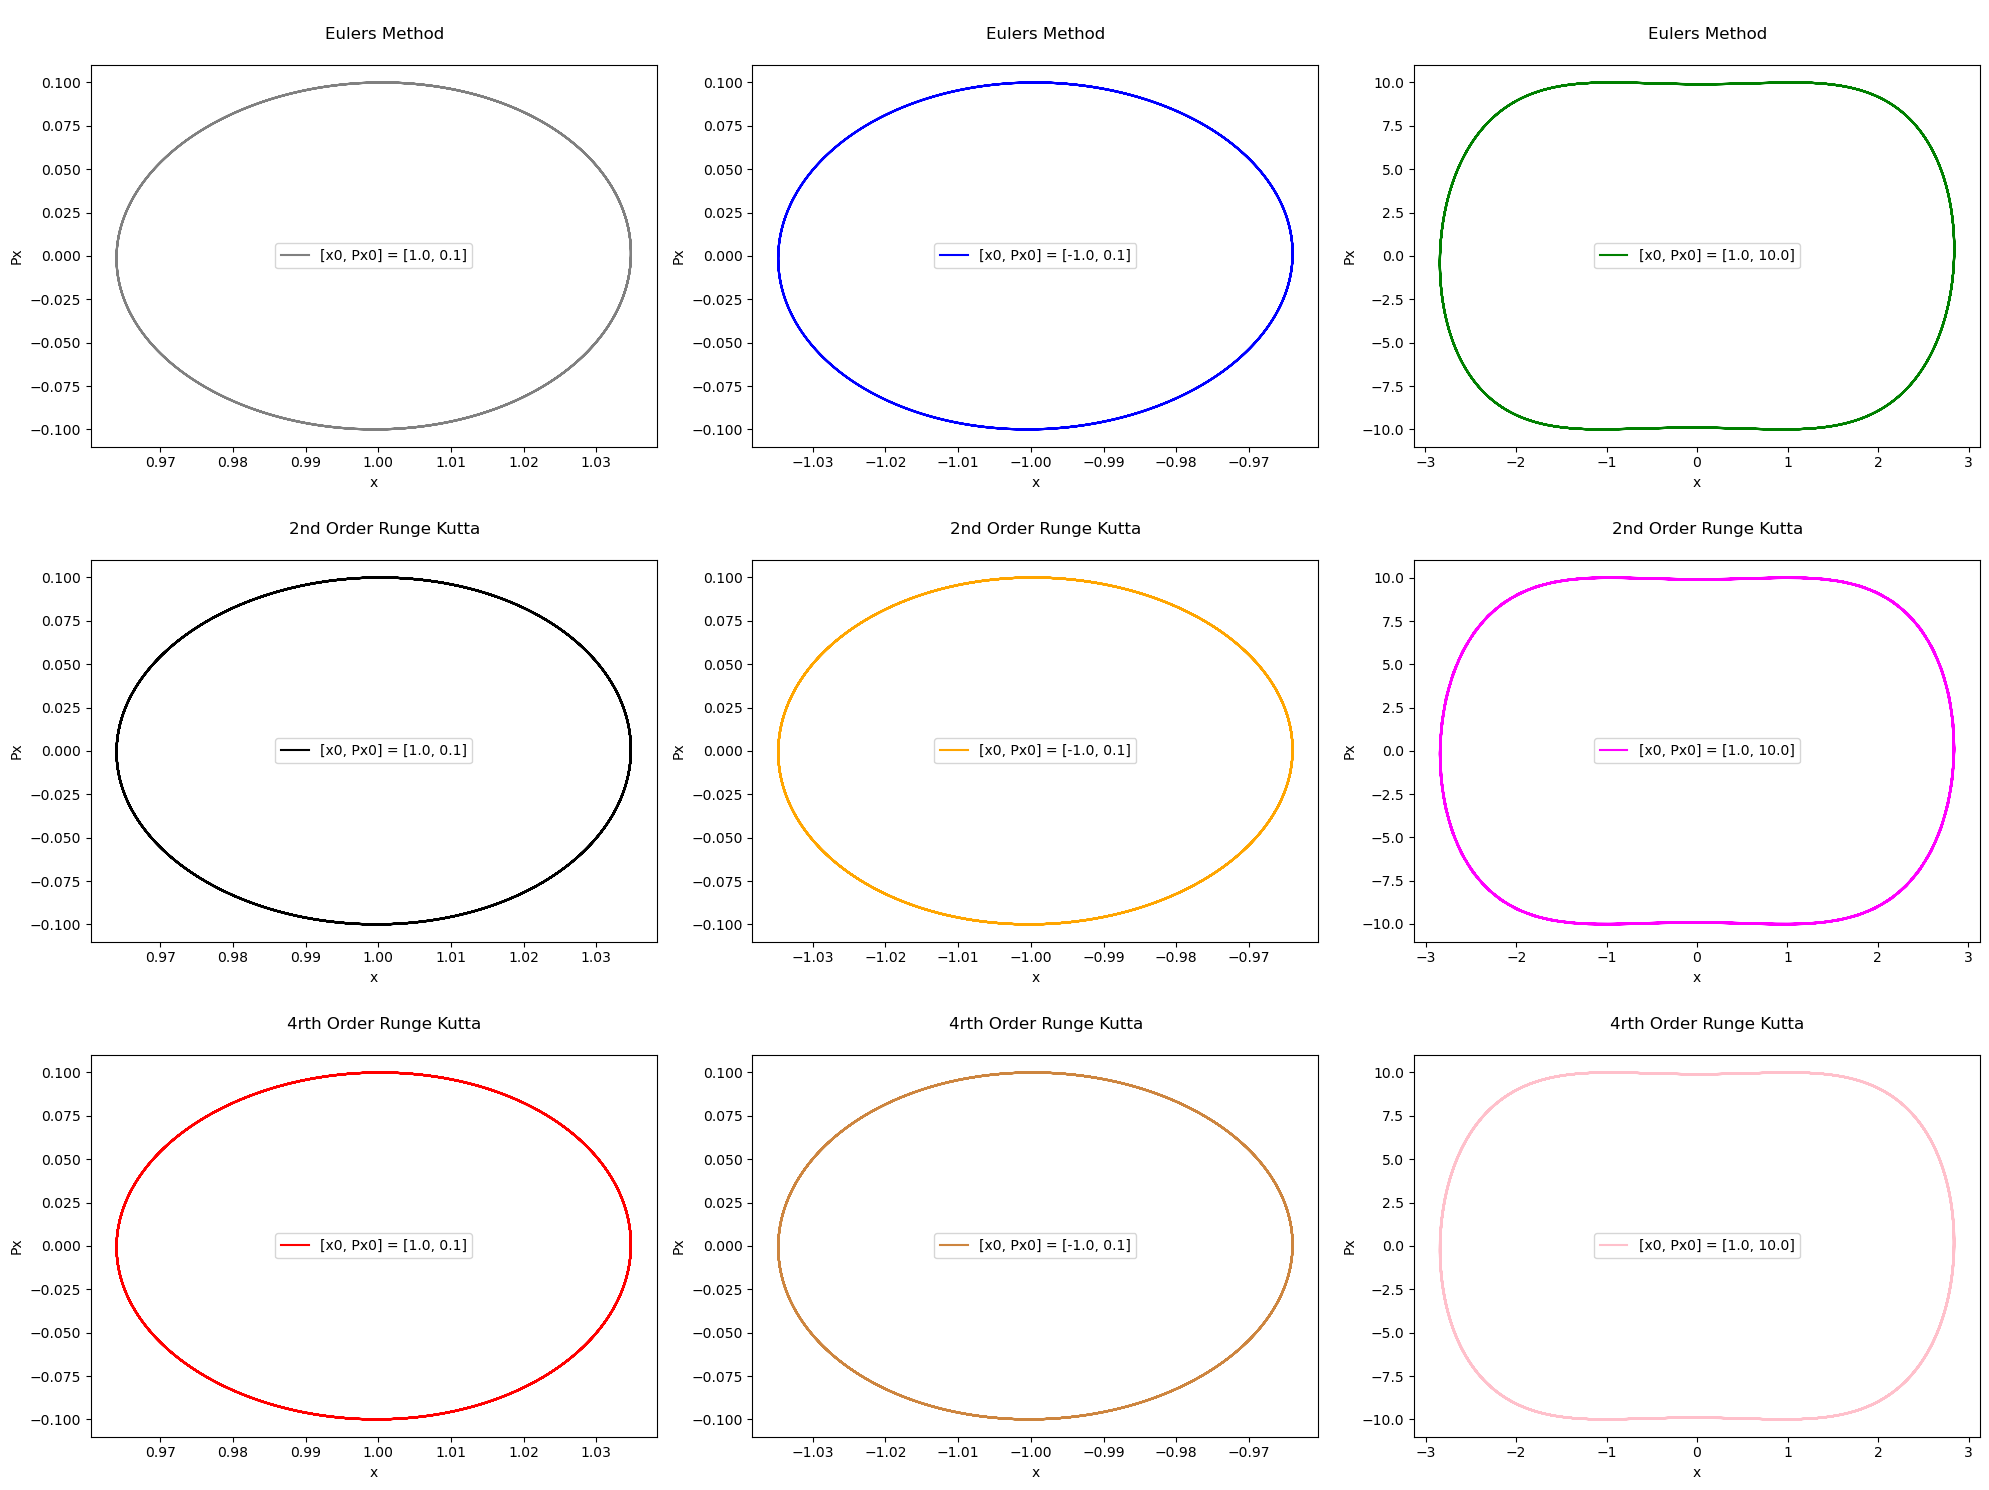

In [6]:
dt = 0.01  # Time interval
num = 1000  # Number of steps


#initial conditions 
ini_cond = [[1.0, 0.1],
      [-1.0, 0.1],
      [1.0, 10.0]]
colors = [['grey','blue','green'],
         ['black','orange','magenta'],
         ['red','peru','pink']]
fig, axes = plt.subplots(3,3, figsize=(20,15))

functions = [Eulers_Method, Runge_Kutta_2nd,Range_Kutta_4rth]
for func in functions:
    for i in ini_cond:
        x_, Px_ = func(i[0],i[1], dt, num)
        axes[functions.index(func),ic.index(i)].plot(x_, Px_, label=f"[x0, Px0] = {i}", color=colors[functions.index(func)][ic.index(i)])
        axes[functions.index(func),ic.index(i)].set_xlabel("x")
        axes[functions.index(func),ic.index(i)].set_ylabel("Px")
        axes[functions.index(func),ic.index(i)].legend()
        axes[functions.index(func),ic.index(i)].set_title(f"{func.__doc__}")
plt.tight_layout()
plt.show()

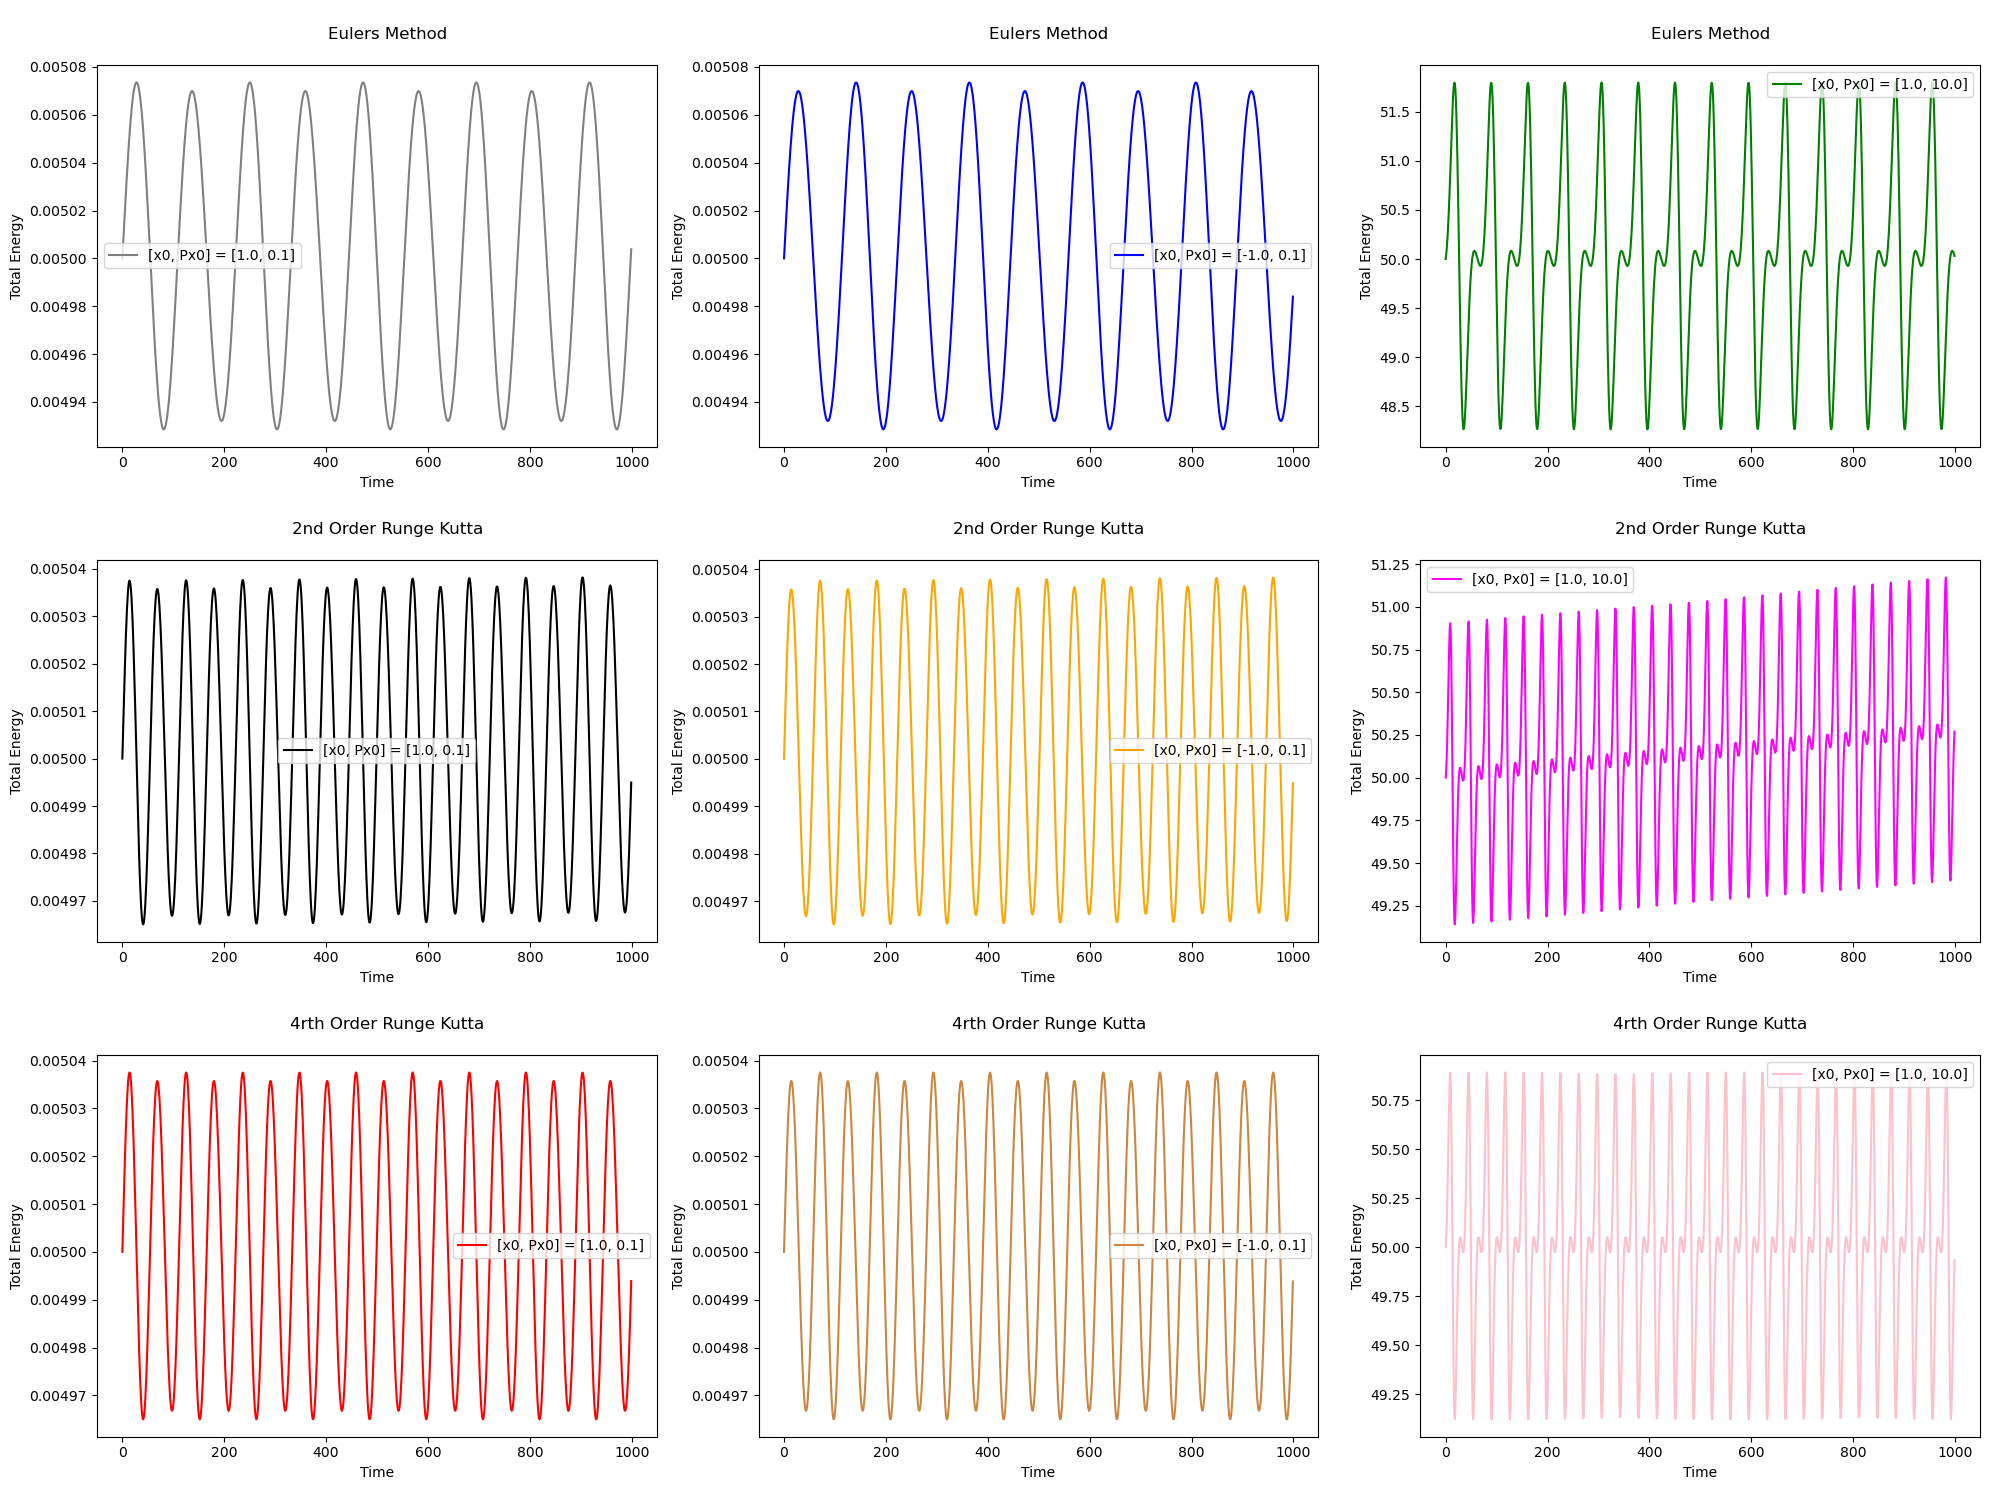

In [8]:
dt = 0.01
num = 1000
fig, axes = plt.subplots(3,3, figsize=(20,15))
for func in functions:
    for i in ini_cond:
        x_, Px_ = func(i[0],i[1], dt, num)
        E = 0.5*(np.array(Px_)**2)+V(np.array(x_)) # energy defined
        axes[functions.index(func),ic.index(i)].plot(E, label=f"[x0, Px0] = {i}", color=colors[functions.index(func)][ic.index(i)])
        axes[functions.index(func),ic.index(i)].set_xlabel("Time")
        axes[functions.index(func),ic.index(i)].set_ylabel("Total Energy")
        axes[functions.index(func),ic.index(i)].legend()
        axes[functions.index(func),ic.index(i)].set_title(f"{func.__doc__}")
plt.tight_layout()
plt.show()


# Problem 3

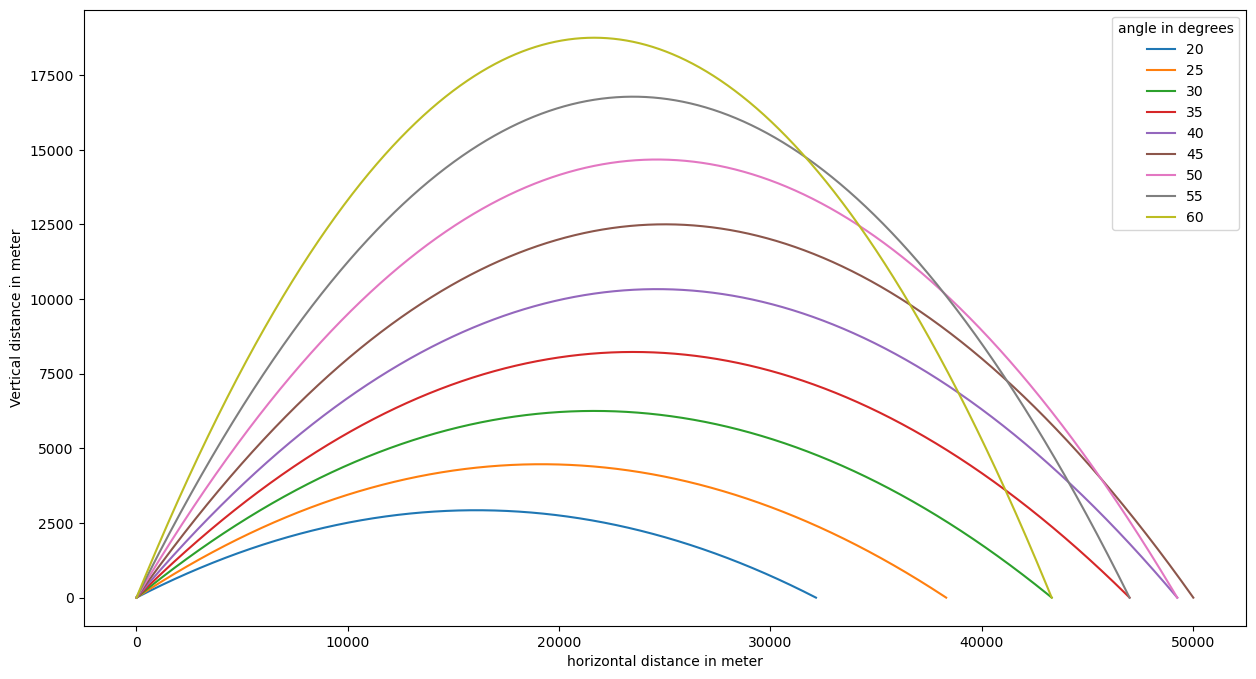

In [12]:
g = 9.8 
angle_deg = list(np.arange(20,65,5)) ; angle_rad = np.radians(angle_deg)
x_r=[]
y_r=[]
ranges = []
for i in angle_rad:
    v0 = 700
    vx = [v0 * np.cos(i)]
    vy = [v0 * np.sin(i)]
    x = [0]
    y = [0]
    h = 0.01
    n = 15000
    for j in range(n):
        vx_new = vx[-1] #-1 because we want last value
        vy_new = vy[-1] - g*h
        x_new = x[-1] + vx[-1]*h
        y_new = y[-1] + vy[-1]*h
        
        x.append(x_new)
        y.append(y_new)
        vy.append(vy_new)
        
        if y[-1]<0:
            break
        else:
            continue
    ranges.append(x[-1])
    x_r.append(x)
    y_r.append(y)
plt.figure(figsize=(15,8))
for j in list(angle_deg):
    plt.plot(x_r[angle_deg.index(j)],y_r[angle_deg.index(j)],label=f'{j}')
    plt.xlabel('horizontal distance in meter')
    plt.ylabel('Vertical distance in meter')
    plt.legend(title='angle in degrees')
    

The index for which range is max is 5
The angle correponding to the angle for max range: 45


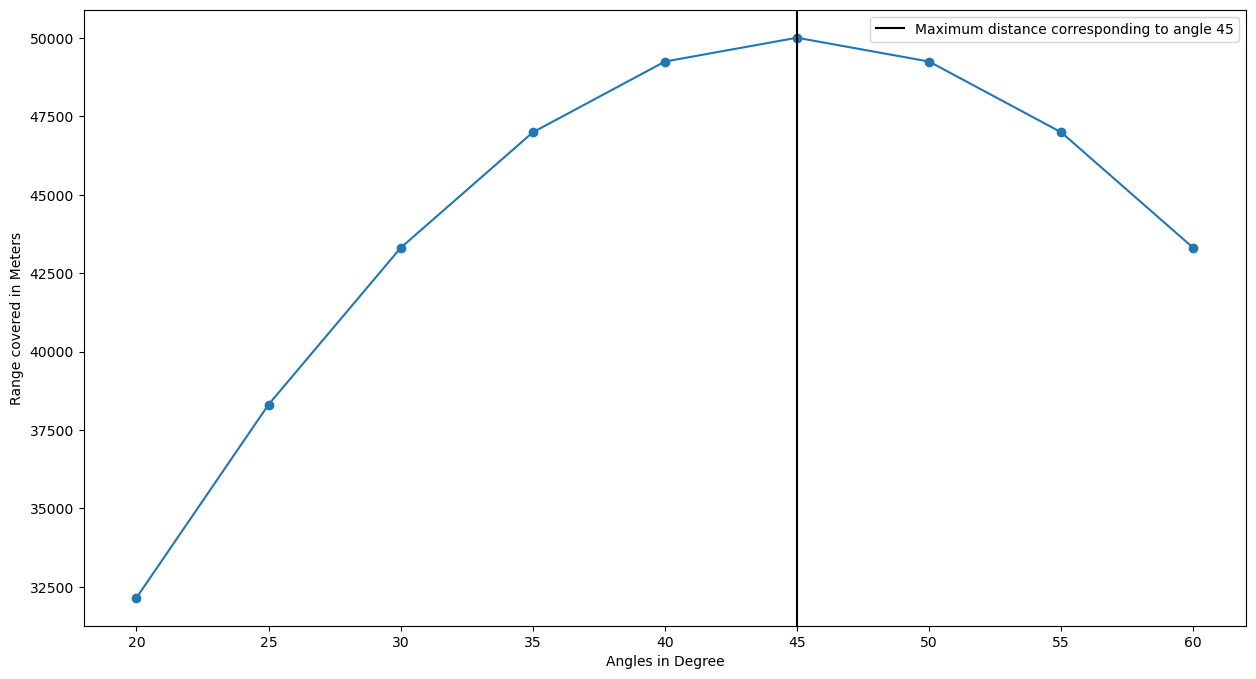

In [13]:
plt.figure(figsize=(15,8))
plt.plot(angle_deg,ranges,marker='o', linestyle='-')
plt.axvline(x=45, color='k', linestyle='-', label='Maximum distance corresponding to angle 45')
plt.xlabel('Angles in Degree')
plt.ylabel('Range covered in Meters')
a = np.argmax(ranges) #calculates the maximum index corresponding to range
print(f'The index for which range is max is {a}')
f = angle_deg[a] #the index gives the angle value for which the range is max
print(f'The angle correponding to the angle for max range: {f}')
plt.legend()

# Problem 4

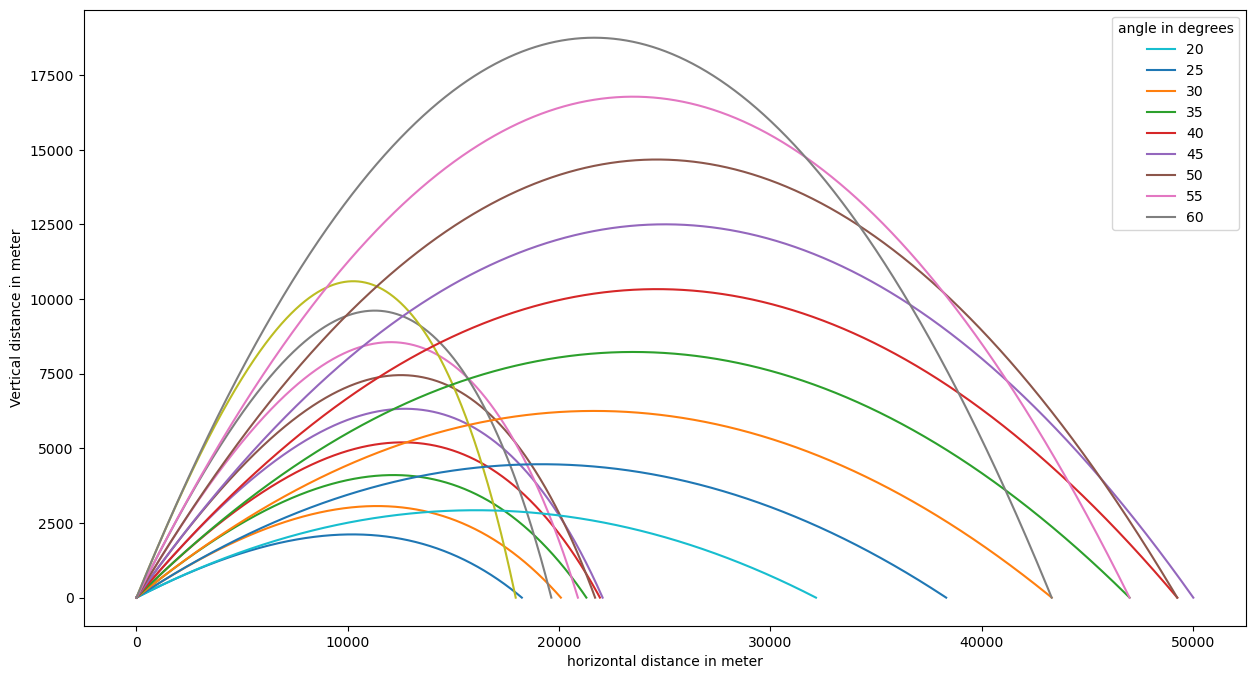

In [14]:
g = 9.8 ; b_by_m = 4e-5
angle_deg = list(np.arange(20,65,5)) ; angle_rad = np.radians(angle_deg)

plt.figure(figsize=(15,8))

ranges = []
for i in angle_rad:
    v0 = 700
    vx = [v0 * np.cos(i)]
    vy = [v0 * np.sin(i)]
    x_a = [0]
    y_a = [0]
    h = 0.01
    n = 15000
    for j in range(n):
        vx_new_air = vx[-1] - (b_by_m * (np.sqrt(vx[-1]**2 + vy[-1]**2)) * vx[-1] * h ) #-1 because we want last value
        vy_new_air = vy[-1] - g*h - (b_by_m * (np.sqrt(vx[-1]**2 + vy[-1]**2)) * vy[-1] * h)
        x_new_air = x_a[-1] + vx[-1]*h
        y_new_air = y_a[-1] + vy[-1]*h
        
        x_a.append(x_new_air)
        y_a.append(y_new_air)
        vy.append(vy_new_air)
        vx.append(vx_new_air)
        
        if y_a[-1]<0:
            break
        else:
            continue
    ranges.append(x_a[-1])
    plt.plot(x_a,y_a)
    
    plt.xlabel('horizontal distance in meter')
    plt.ylabel('Vertical distance in meter')
for j in list(angle_deg):
    plt.plot(x_r[angle_deg.index(j)],y_r[angle_deg.index(j)],label=f'{j}')
    plt.xlabel('horizontal distance in meter')
    plt.ylabel('Vertical distance in meter')
    plt.legend(title='angle in degrees')


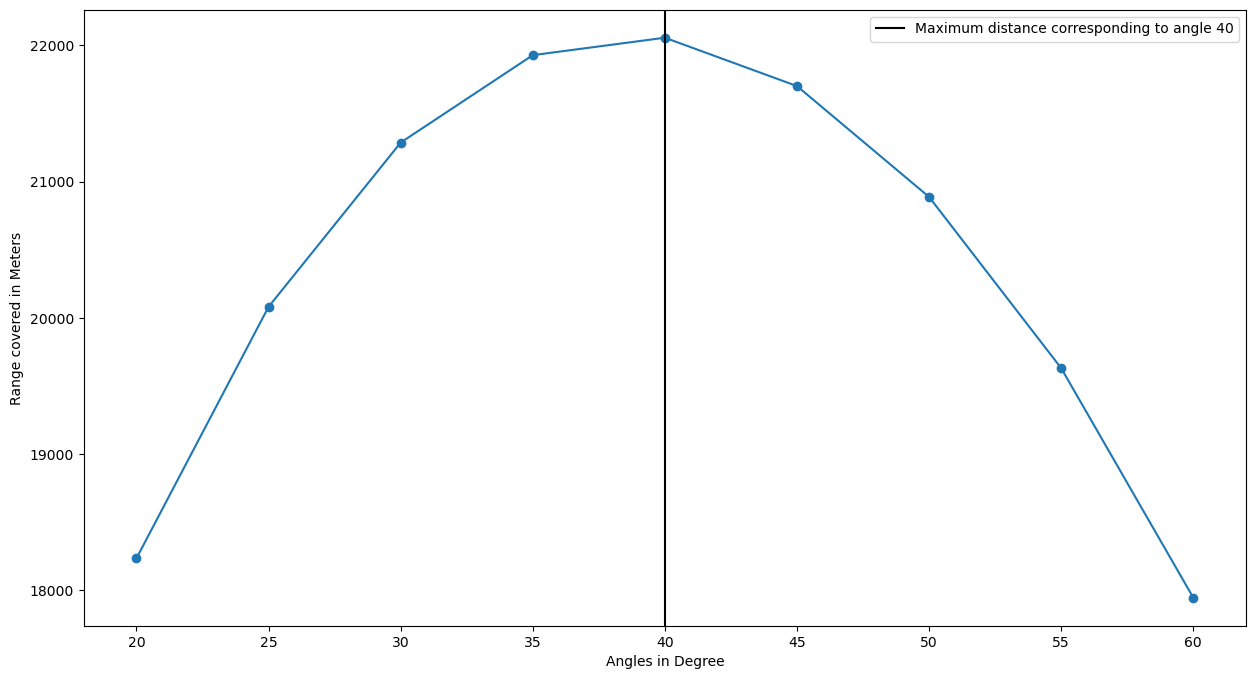

In [15]:
plt.figure(figsize=(15,8))
plt.plot(angle_deg,ranges,marker='o', linestyle='-')
plt.axvline(x=40, color='k', linestyle='-', label='Maximum distance corresponding to angle 40')
plt.xlabel('Angles in Degree')
plt.ylabel('Range covered in Meters')
plt.legend()
